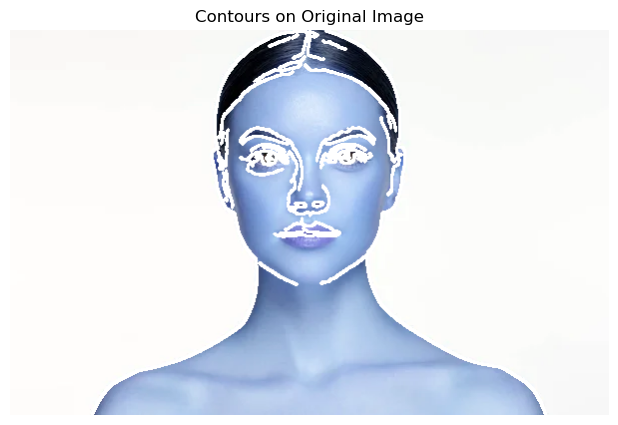

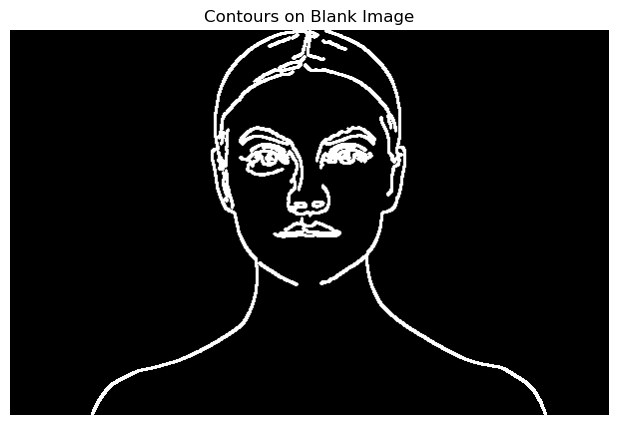

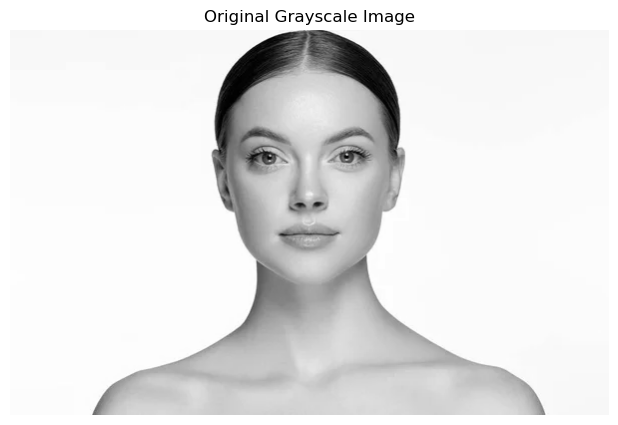

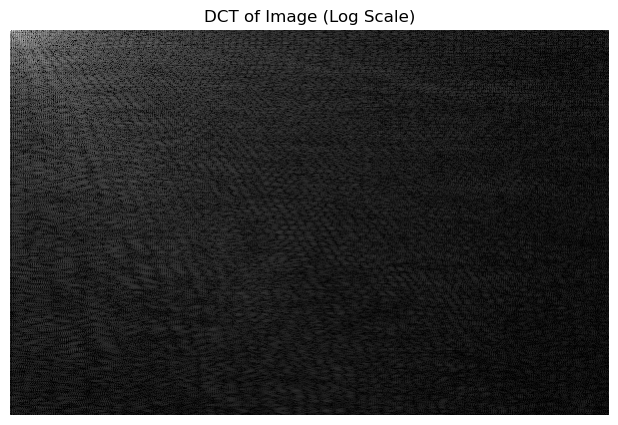

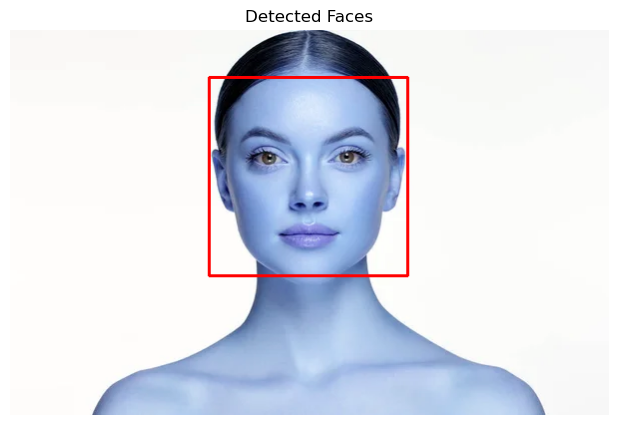

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display images in Jupyter
def show_image(img, title="Image", cmap_type=None):
    plt.figure(figsize=(10, 5))
    plt.title(title)
    plt.imshow(img if cmap_type is None else cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap=cmap_type)
    plt.axis('off')
    plt.show()

# Load the image
image_path = 'face.jpg'
image = cv2.imread(image_path)

# 1) Perform Boundary Detection on image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edges = cv2.Canny(blurred, 50, 150)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original and blank images
contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (255, 255, 255), 2)
blank_image = np.zeros_like(image)
cv2.drawContours(blank_image, contours, -1, (255, 255, 255), 2)

# Display contour images
show_image(contour_image, "Contours on Original Image")
show_image(blank_image, "Contours on Blank Image")

# 2) To find Discrete Cosine Transform
dct = cv2.dct(np.float32(gray))
dct_log = np.log(np.abs(dct) + 1)
dct_norm = cv2.normalize(dct_log, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Display DCT results
show_image(gray, "Original Grayscale Image", cmap_type='gray')
show_image(dct_norm, "DCT of Image (Log Scale)", cmap_type='gray')

# 3) To use Haar Transform object detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30), flags=cv2.CASCADE_SCALE_IMAGE)

# Draw rectangles around detected faces
face_rectangles = np.array(faces)
if face_rectangles.size > 0:  # Ensure there are detected faces
    rectangles = np.array([[x, y, x + w, y + h] for (x, y, w, h) in face_rectangles])
    cv2.rectangle(image, tuple(rectangles[:, :2].flatten()), tuple(rectangles[:, 2:].flatten()), (255, 0, 0), 2)

# Display the result with detected faces
show_image(image, "Detected Faces")
